Text(0.5, 1.0, 'Activation Process')

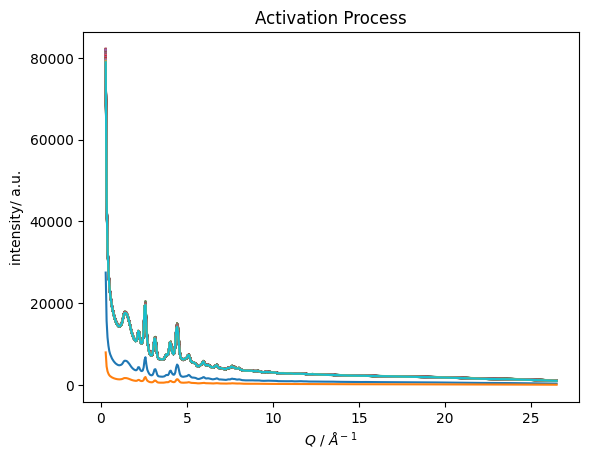

In [2]:
from cProfile import label
from stringprep import in_table_b1
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os

path = 'C:/Users/Mueller/Desktop/Desy_processed/FMue_2_third_run/*.dat'

file_list = glob.glob(path)

data_dict = {}
count = 0  # Counter for number of files processed
for file_name in file_list:
    #if count >= 10000:  # Stop processing files after 100 have been processed
       # break
    #if count > 1:  # Only include the first 25 files
    name = file_name.split('/')[-1]
    name = name[3:-3]
    data = np.loadtxt(file_name, skiprows=23)
    max_y = np.max(data[:, 1])  # Find the maximum y value
    norm_y = data[:, 1] / max_y  # Normalize the y data
    data_dict[name] = (data[:, 0], data[:, 1])  # Store the normalized data
        
        
    #count += 1

# Plot the data
fig, ax = plt.subplots()
for name, data in data_dict.items():
    ax.plot(data[0], data[1], label=name)
#ax.legend(loc = 'center left') #bbox_to_anchor=(1.05,0.5), ncol=2
plt.xlabel('$Q$ / $\AA$$^-$$^1$')
plt.ylabel('intensity/ a.u.')
plt.title('Activation Process')
#plt.legend(loc='upper right')
#print(name)
#plt.xlim(2,3)
#plt.ylim(5000,10000)

C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat
C:/Users/Mueller/Desktop/Desy_Feli

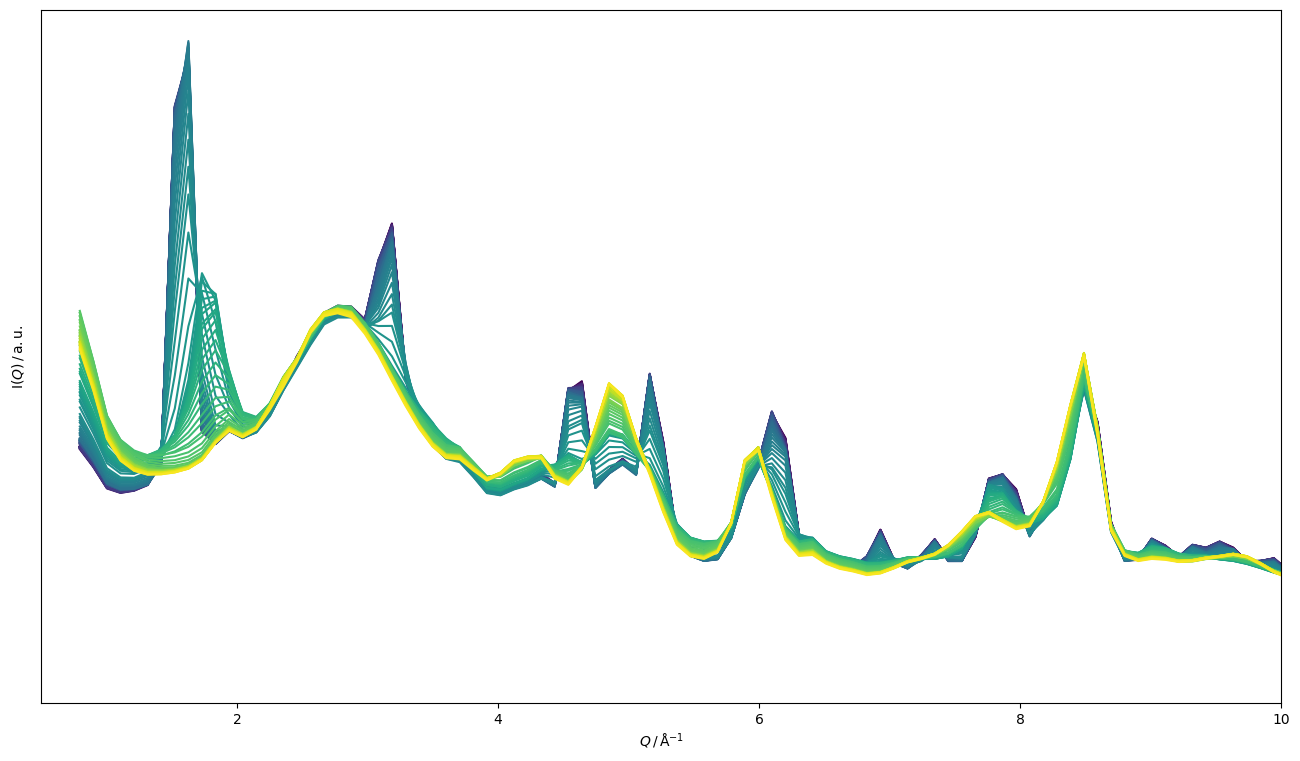

In [10]:
from matplotlib.cm import viridis
from glob import glob
import matplotlib.pyplot as plt 
import numpy as np

file_path = 'C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat'
#C:\Users\Mueller\Desktop\Desy_Felix_2023\Desy_processed\FMue_3\FMue_3_20231024_175355_00001.dat
data_file_paths = glob(file_path)
### normalizing data ###
offset = 0



plt.figure(figsize=(16, 9))
color_map = viridis  # Get the viridis colormap
for i, idx in enumerate(data_file_paths):
    #offset += 0.05
    print(file_path)
    data = np.loadtxt(data_file_paths[i], skiprows=28)  # Skip the header lines
    q_values = data[:, 0]
    I_values = data[:, 1]
    #I_values = data[:, 1] / np.max(data[:, 1])
    #print(data, np.max(data[:, 1]))
    lbl = data_file_paths[i].split('/')[-1]

    cmap = color_map(float(i) / len(data_file_paths))
    plt.plot(q_values, I_values + offset, label=lbl, color=cmap)
    #print(float(idx) / len(plot_indices), len(plot_indices))
#plt.xlim(0.1, 10)
#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))





plt.xlim(0.5, 10)

#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel('$Q$$\,/\,\mathrm{\AA}^{-1}$')
plt.ylabel('I($Q$)$\,/\,\mathrm{a.u.}$')
# Remove y-axis labels and ticks
plt.gca().set_yticklabels([])  # Hide y-axis labels
plt.gca().tick_params(left=False)  # Hide y-axis ticks on the left side

safe_file = "/home/feilix/Git_Fit/results/natalia/figures"
title = "ex_situ_+_in_situ_0_5-10"
#print(f'{safe_file}/{title}.svg')
#plt.savefig(f'{safe_file}/{title}.svg', format='svg')

C:/Users/Mueller/Desktop/Desy_Felix_2023/calc_Co_xrds\Co.xye
C:/Users/Mueller/Desktop/Desy_Felix_2023/calc_Co_xrds\Co3O4.xye
C:/Users/Mueller/Desktop/Desy_Felix_2023/calc_Co_xrds\CoO.xye


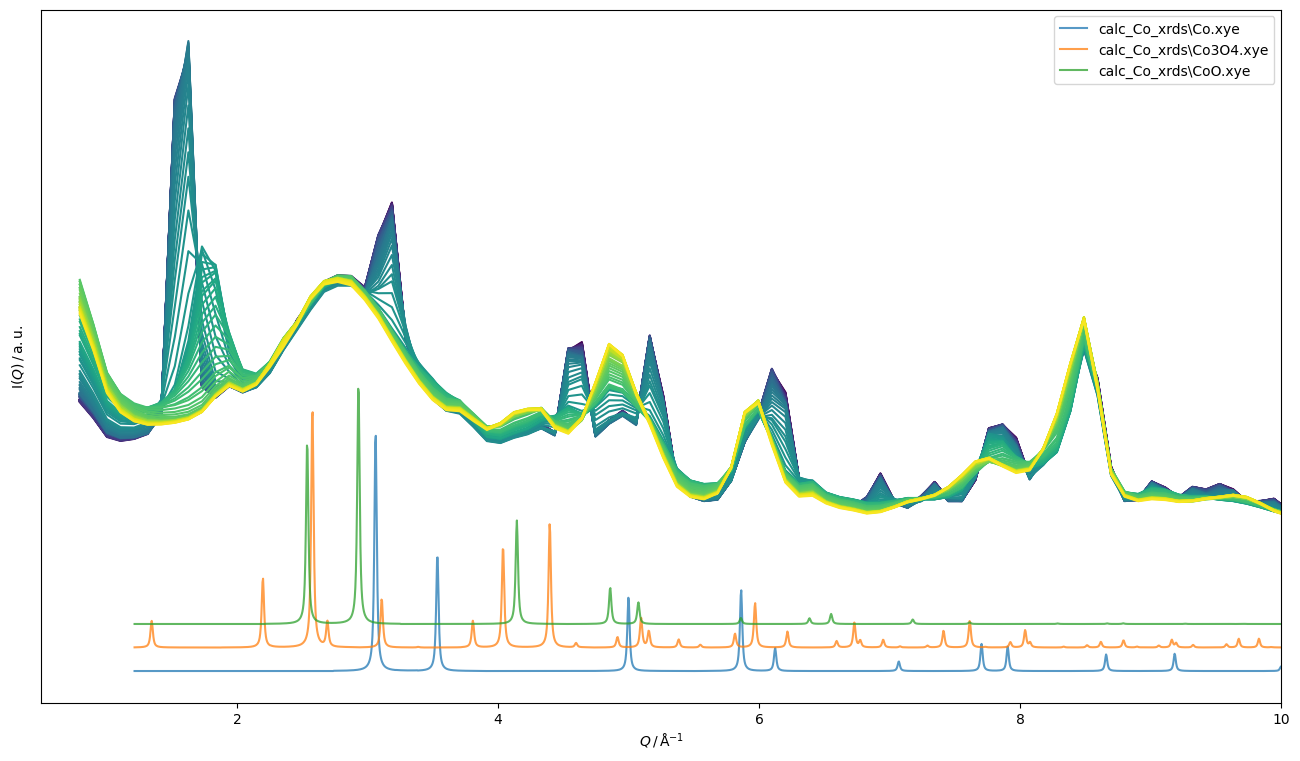

In [11]:
from matplotlib.cm import viridis
from glob import glob
import numpy as np

file_path = 'C:/Users/Mueller/Desktop/Desy_Felix_2023/Desy_processed/FMue_3/*.dat'
path_calc_xrd = 'C:/Users/Mueller/Desktop/Desy_Felix_2023/calc_Co_xrds/*.xye'
data_file_paths = glob(file_path)
### normalizing data ###
offset = 0



lam = 0.5
tt_t_q = lambda x: 4 * np.pi * np.sin(x * np.pi / (180 * 2 )) / lam
offset = 0
plt.figure(figsize=(16, 9))

for idx in glob(path_calc_xrd):
    offset += 1000
    print(idx)
    data = np.loadtxt(idx, skiprows=28)  # Skip the header lines
    TT_values = data[:, 0]
    I_values = data[:, 1] / np.max(data[:, 1])
    q_values = tt_t_q(TT_values)
    #print(data, np.max(data[:, 1]))
    lbl = idx.split('/')[-1]
    plt.plot(q_values, I_values * 10000 + offset, label=lbl, alpha=0.75)
    plt.legend(loc='upper right')


color_map = viridis  # Get the viridis colormap
for i, idx in enumerate(data_file_paths):
    #offset += 0.05
    #print(file_path)
    data = np.loadtxt(data_file_paths[i], skiprows=28)  # Skip the header lines
    q_values = data[:, 0]
    I_values = data[:, 1]
    #I_values = data[:, 1] / np.max(data[:, 1])
    #print(data, np.max(data[:, 1]))
    lbl = data_file_paths[i].split('/')[-1]

    cmap = color_map(float(i) / len(data_file_paths))
    plt.plot(q_values, I_values + offset, label=lbl, color=cmap)
    #print(float(idx) / len(plot_indices), len(plot_indices))
#plt.xlim(0.1, 10)
#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))





plt.xlim(0.5, 10)

#plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.xlabel('$Q$$\,/\,\mathrm{\AA}^{-1}$')
plt.ylabel('I($Q$)$\,/\,\mathrm{a.u.}$')
# Remove y-axis labels and ticks
plt.gca().set_yticklabels([])  # Hide y-axis labels
plt.gca().tick_params(left=False)  # Hide y-axis ticks on the left side

safe_file = "/home/feilix/Git_Fit/results/natalia/figures"
title = "ex_situ_+_in_situ_0_5-10"
#print(f'{safe_file}/{title}.svg')
#plt.savefig(f'{safe_file}/{title}.svg', format='svg')

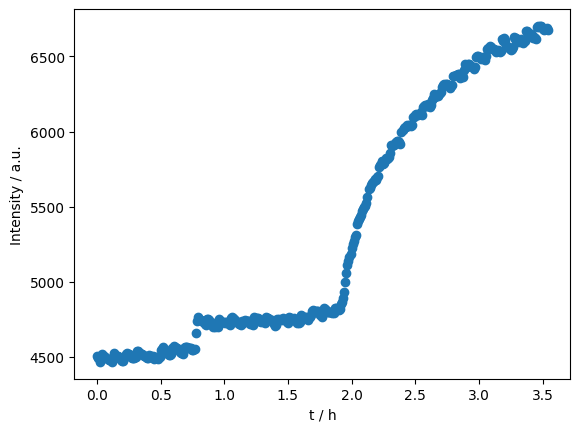

In [36]:

from cProfile import label
from stringprep import in_table_b1
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import glob
import os


fig, ax = plt.subplots()
path = 'C:/Users/Mueller/Desktop/Desy_processed/FMue_2/*.dat'
base_path = 'C:/Users/manzoni/Desktop/NiFe_dyn_Kat/'
file_list = glob.glob(path)

peak_values = []

for i, file_name in enumerate(file_list):
    # if i < 4:
    #     continue
    name = file_name.split('/')[-1]
    name = name[3:-3]
    data = np.loadtxt(file_name, skiprows=26)
    max_y = np.max(data[:, 1])
    norm_y = data[:, 1] / max_y

    # Find peak value between 2.4 and 2.55
    x_vals = data[:, 0]
    y_vals = data[:, 1]
    peak_mask = np.logical_and(x_vals >= 3.4, x_vals <= 3.6)
    peak_value = np.max(y_vals[peak_mask])

    peak_values.append([i, peak_value])

      # Print the file name and peak value
    #print(f"File: {i}  Peak Value: {peak_value}")



#Save peak values to a txt file
# with open('peak_values.txt', 'w') as f:
#     for entry in peak_values:
#         f.write(f'{entry[0]}\t{entry[1]}\n')


# Convert peak_values to NumPy array for plotting
peak_values = np.array(peak_values)

# Scatter plot of peak values
ax.scatter(peak_values[:, 0] / 120, peak_values[:, 1])
ax.set_xlabel('t / h')
ax.set_ylabel('Intensity / a.u.')
#plt.title('Fe$_2$NiO$_4$ (311) peak intensity')

# for i in range(7):
#     start = 114 * i / 120
#     end = start + 57 / 120
#     ax.axvspan(start, end, facecolor='green', alpha=0.2)
# # for i in range(4):
# #     start = 114 * i + 57
# #     end = start + 57
# #     plt.axvspan(start, end, facecolor='green', alpha=0.2)
# for i in range(1):
#     start = i + 809 / 120
#     end = start + 200 / 120
#     ax.axvspan(start, end, facecolor='red', alpha=0.2)
# ax.set_xticks(np.arange(0, 10, 2))
# ax.set_xlim(0, peak_values[:, 0].max()/120)

# plt.savefig(f'{base_path}spinel_peak.png', bbox_inches='tight', dpi=600)
# plt.savefig(f'{base_path}spinel_peak.pdf', bbox_inches='tight', dpi=600)
#plt.ylim(8000,20000)
#plt.xlim(0,2)
plt.show()